In [1]:
"""
Created on Mon Jan 20 08:38:52 2020

@author: carlos
"""
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

# plt.close('all')
data_path = '../../data/'

# 1. Fetch the CIFAR-10 dataset and transform it to grayscale

In [2]:
transform_test = transforms.Compose([transforms.Grayscale()])
trainset = torchvision.datasets.CIFAR10(root=data_path,train=True, download=True, transform=transform_test)

def dataset_to_matrix(pytorch_dataset):
    mat = [np.array(x[0]) for x in pytorch_dataset];
    return np.stack(mat)

image_array = dataset_to_matrix(trainset)

100.0%

# 2. Visualize some images

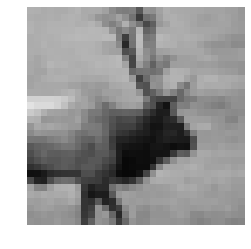

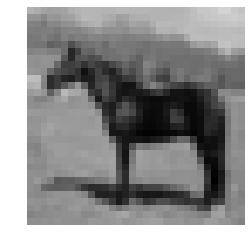

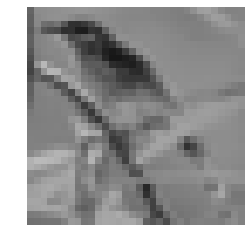

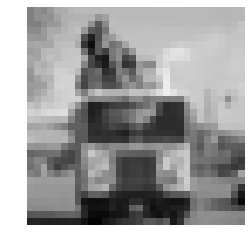

In [3]:
for ind in [34,2480,800,1034]:
    plt.figure()
    plt.imshow(image_array[ind,:,:],cmap='gray', vmin=0, vmax=255)
    plt.axis('off')
    # plt.colorbar()
#     plt.savefig('plots/cov_matrix_cifar10/example_'+str(ind) + '.pdf',bbox_inches='tight')`

# 3. Compute and plot the covariance matrix

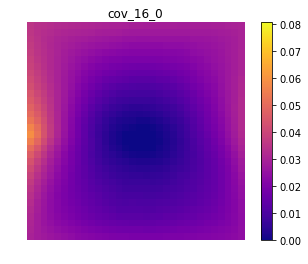

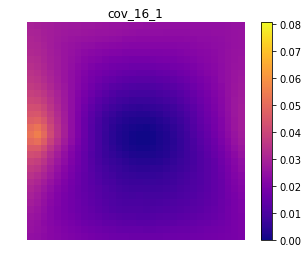

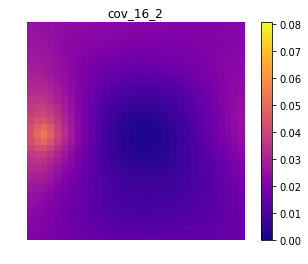

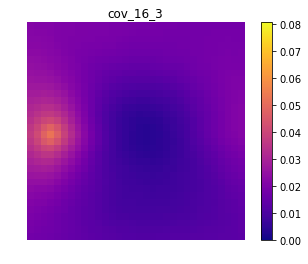

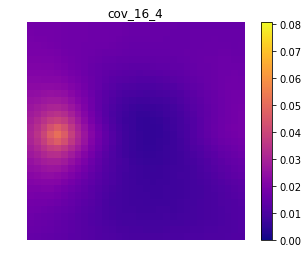

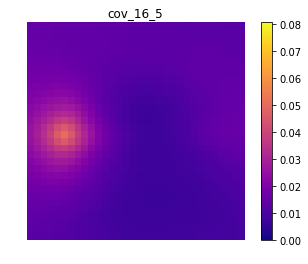

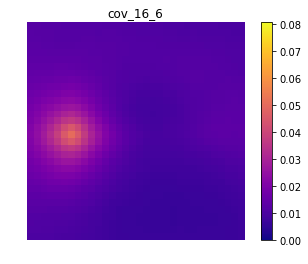

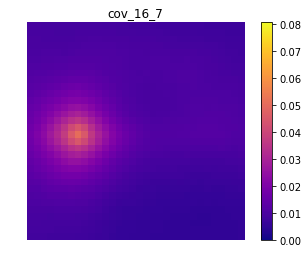

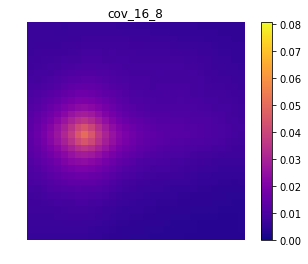

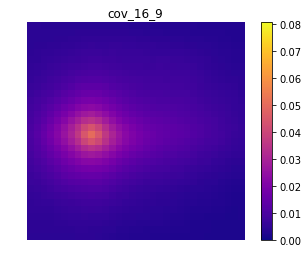

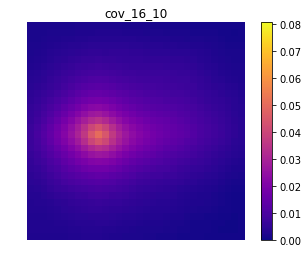

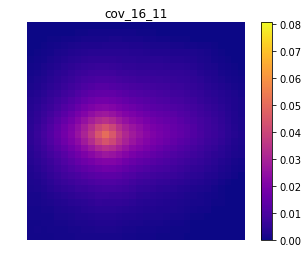

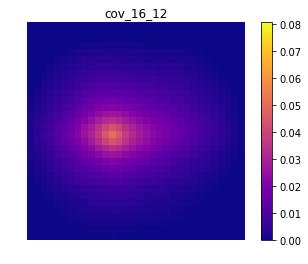

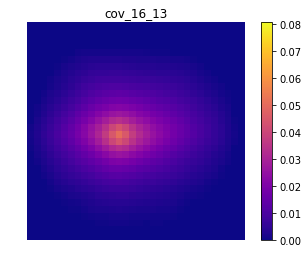

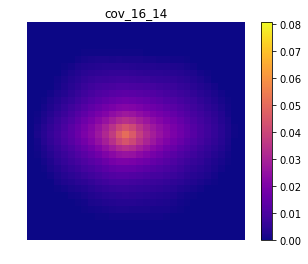

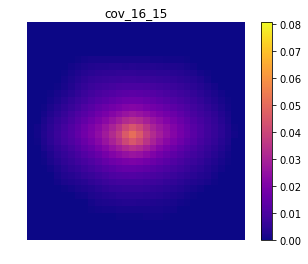

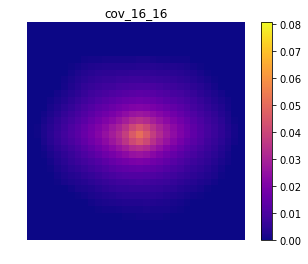

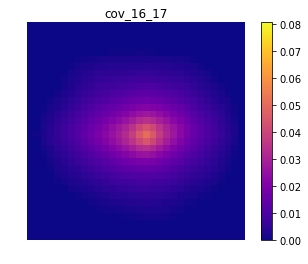

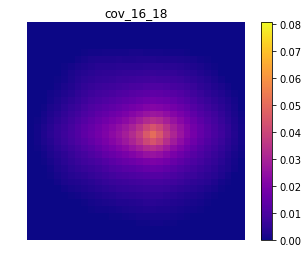

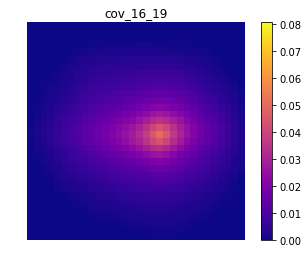

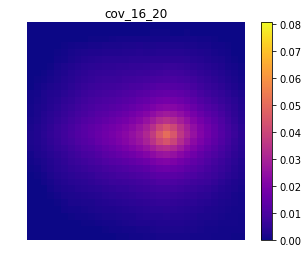

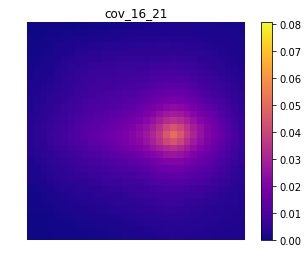

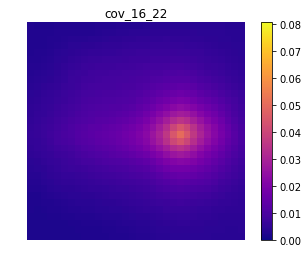

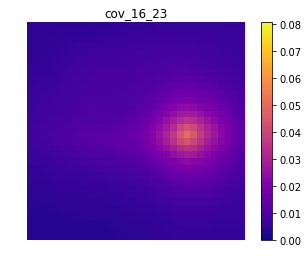

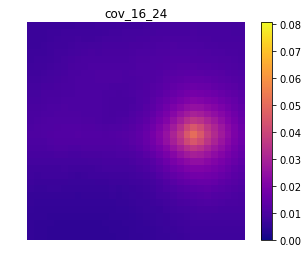

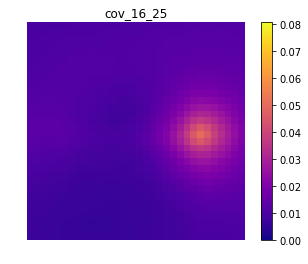

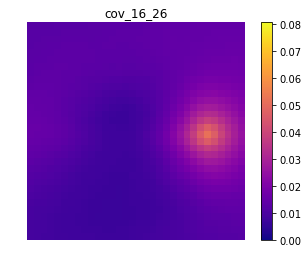

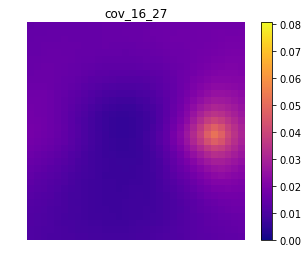

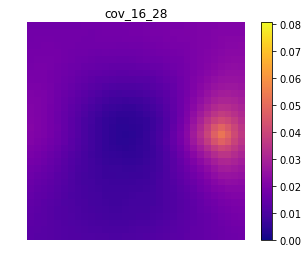

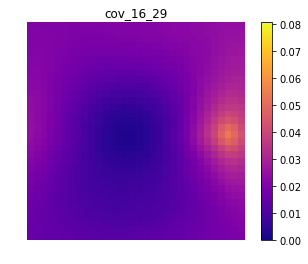

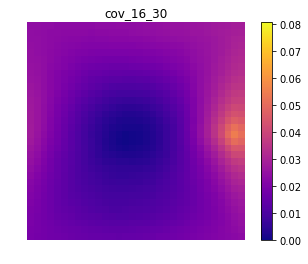

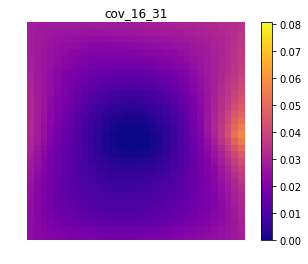

In [7]:
# flatten the image
matrix = image_array.reshape(-1, 32*32)/255

cov_mat = np.cov(matrix, rowvar = False)
max_val = np.amax(cov_mat)
min_val = 0

plot_cov = True

if plot_cov:
    for col in range(32): # np.arange(0,32,8):
        for row in [16]:
            aux_cov = cov_mat[row*32+col,:].reshape(32,32)
            plt.figure()
            plt.imshow(aux_cov,vmin=min_val,vmax=max_val,cmap='plasma')
            plt.axis('off')
            plt.title('cov_'+str(row) + '_' + str(col))
            plt.colorbar()

# 4. Compute and plot the eigen values and principal components

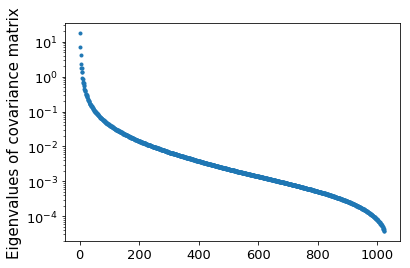

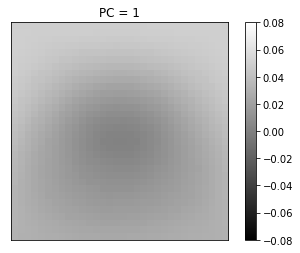

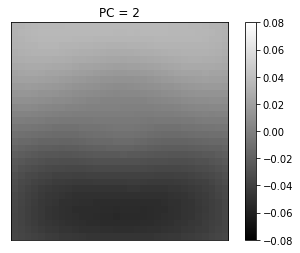

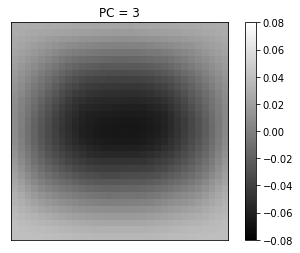

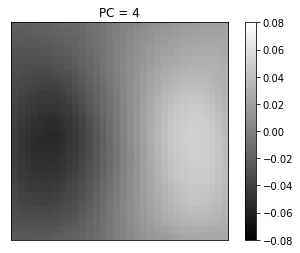

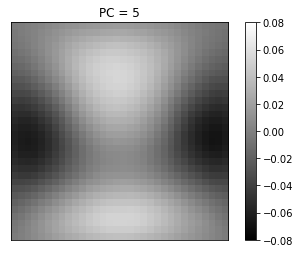

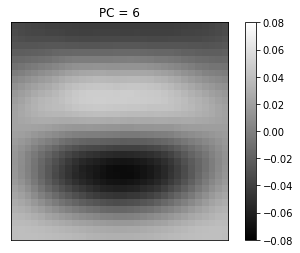

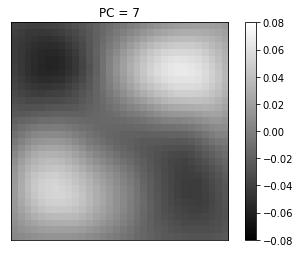

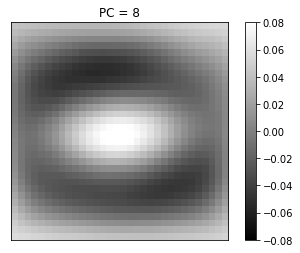

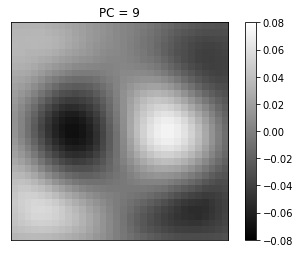

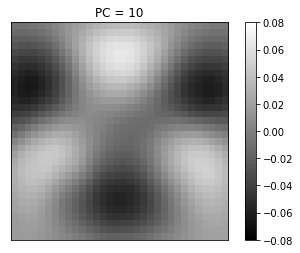

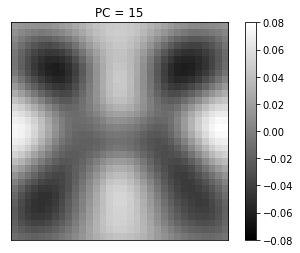

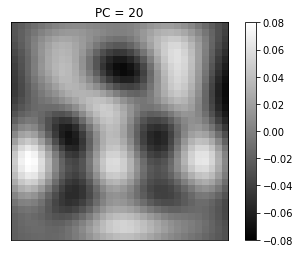

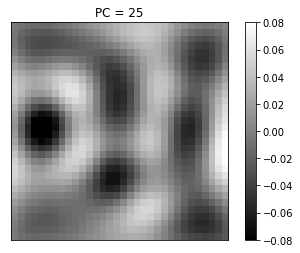

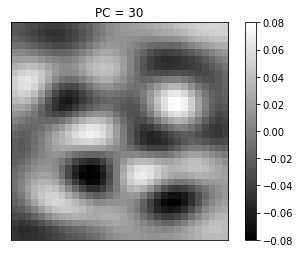

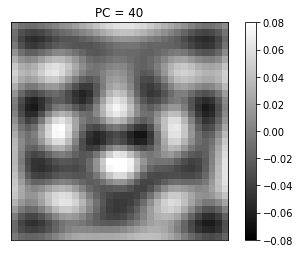

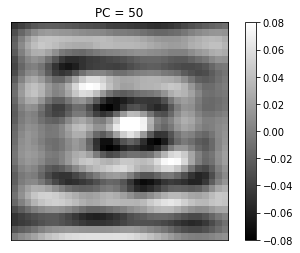

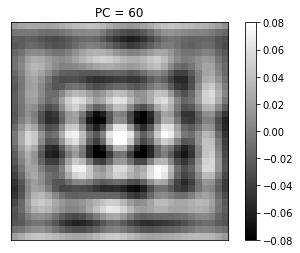

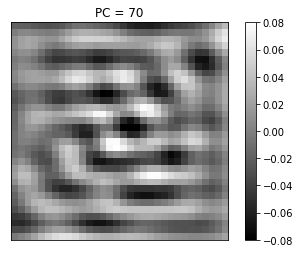

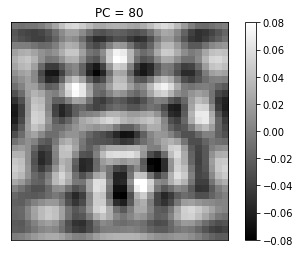

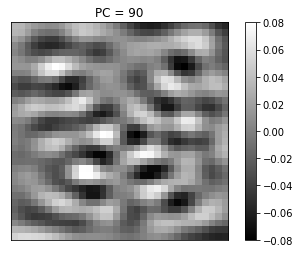

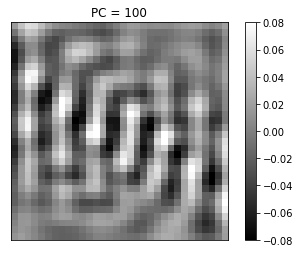

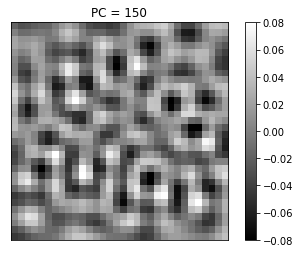

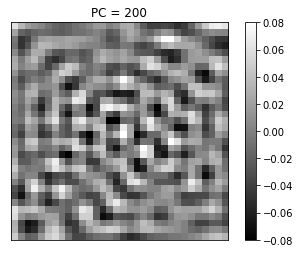

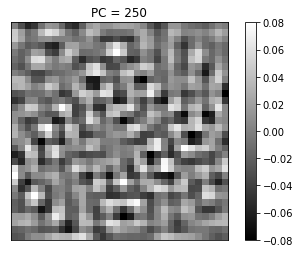

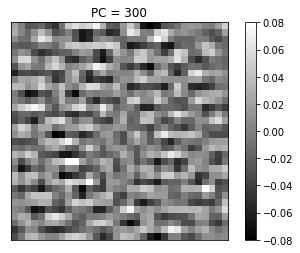

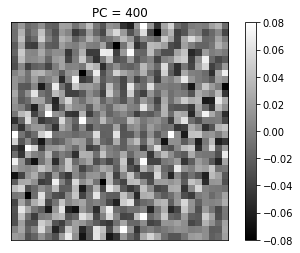

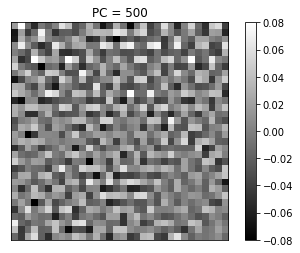

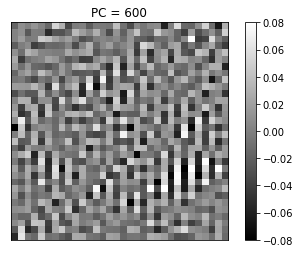

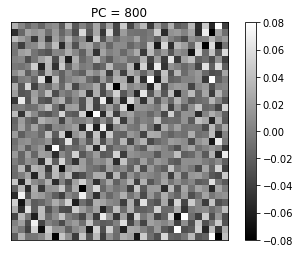

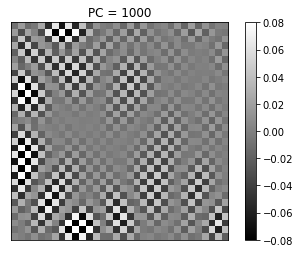

In [10]:
plot_eig = True

if plot_eig:
    
    D_aux,U_aux = np.linalg.eig(cov_mat)
    ind = np.argsort(-1*D_aux, axis=0)
    D = D_aux[ind]
    U = U_aux[:,ind]
    plt.figure()
    plt.plot(range(1,len(D)+1),D,'.')
    plt.yscale('log')
    plt.ylabel('Eigenvalues of covariance matrix',fontsize=15)
    plt.tick_params(labelsize=13)
    
    v_max = 0.08
    v_min = -0.08
    
    pc_inds = [1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50,60,70,80,90,100,150,200,250,300,400,500,600,800,1000]
    for ind in pc_inds:
        plt.figure()
        aux = plt.imshow(U[:,ind-1].reshape((32, 32)),cmap='gray',vmin=v_min,vmax=v_max)
        plt.xticks([])
        plt.yticks([])
        ax = plt.axes()
        plt.colorbar(aux,ax=ax)
        plt.title('PC = {}'.format(ind))